In [12]:
from sklearn.linear_model import LinearRegression
#thu vien
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

#data
loan_demographics=pd.read_csv(r'C:\Users\Lan\OneDrive\Máy tính\Python\Python học\traindemographics.csv')
loan_perf=pd.read_csv(r'C:\Users\Lan\OneDrive\Máy tính\Python\Python học\trainperf.csv')
loan_prev=pd.read_csv(r'C:\Users\Lan\OneDrive\Máy tính\Python\Python học\trainprevloans.csv')
sendy_data=pd.read_csv(r'C:\Users\Lan\OneDrive\Máy tính\Python\Python học\sendy_logistics.csv')

In [13]:
sendy_data.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [14]:
mean_df = round(sendy_data['Temperature'].mean())
mode_df = round(sendy_data['Temperature'].mode()[0])
median_df = round(sendy_data['Temperature'].median())

#Fill with mean
print("Filling with mean value of {}".format(mean_df))
sendy_data['Temperature'] = sendy_data['Temperature'].fillna(mean_df)

#Fill with mode
print("Filling with modal value of {}".format(mode_df))
sendy_data['Temperature'] = sendy_data['Temperature'].fillna(mode_df)

#Fill with median
print("Filling with median value of {}".format(median_df))
sendy_data['Temperature'] = sendy_data['Temperature'].fillna(median_df)

Filling with mean value of 23
Filling with modal value of 25
Filling with median value of 24


<AxesSubplot:>

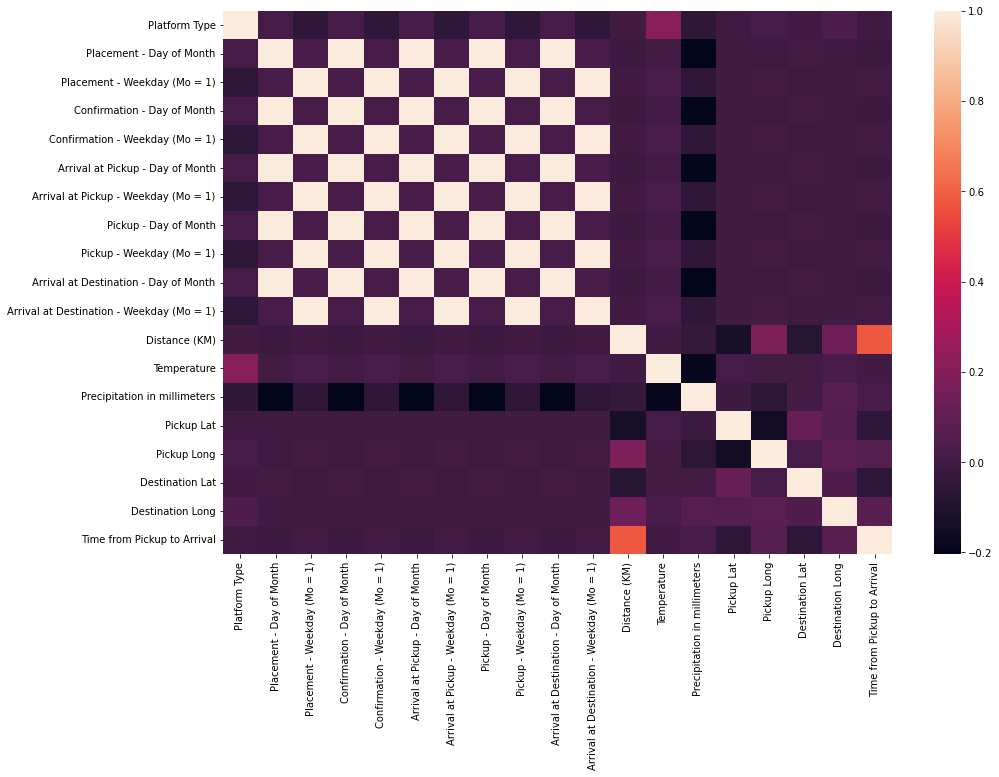

In [15]:
#get correlated values
plt.figure(figsize = (15,10))
sns.heatmap(sendy_data.corr())

In [16]:
lr = LinearRegression()
to_train = ['Precipitation in millimeters', 'Destination Lat', 'Destination Long', 'Time from Pickup to Arrival']

temp_df = sendy_data[to_train]

#Step 1: Split the dataset that contains the missing values and no missing values as test and train respectively
x_train = temp_df[temp_df['Precipitation in millimeters'].notnull()].drop(columns='Precipitation in millimeters')
y_train = temp_df[temp_df['Precipitation in millimeters'].notnull()]['Precipitation in millimeters']
x_test = temp_df[temp_df['Precipitation in millimeters'].isnull()].drop(columns='Precipitation in millimeters')

lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print(np.round(pred, 5))

sendy_data['Precipitation in millimeters'][sendy_data['Precipitation in millimeters'].isnull()] = pred

[8.03056 8.18609 7.86142 ... 8.46164 7.45028 8.60717]


C:\Users\Lan\AppData\Local\Temp\ipykernel_10716\1519196373.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sendy_data['Precipitation in millimeters'][sendy_data['Precipitation in millimeters'].isnull()] = pred


In [17]:
#get the index of missing so we can some of the values used for filling
missing_indx = list(sendy_data['Temperature'][sendy_data['Temperature'].isna()].index)

VÍ DỤ 2

In [18]:
#library
import numpy as np
import pandas as pd
import random

In [19]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train,diabetes_y_train=diabetes_X[:-2],diabetes_y[:-2].reshape(1,-1).T
diabetes_X_test,diabetes_y_test=diabetes_X[-2:],diabetes_y[-2:].reshape(1,-1).T

In [23]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [24]:
diabetes_y.shape

(442,)

In [25]:
diabetes_y_train.shape

(440, 1)

In [26]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [28]:
diabetes_y_train

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(diabetes_X_train, diabetes_y_train)
pred = model.predict(diabetes_X_test)
print('pre:',pred)
print('actual', diabetes_y_test)

pre: [[211.74929866]
 [ 53.19292183]]
actual [[220.]
 [ 57.]]


In [31]:
#hàm score để biết nó học (train) so với cái data của mình thì đã đúng chưa (51.5%)
#underfit: tăng độ phức tạp của thuật toán
#overfit: giảm độ phức tạp
model.score(diabetes_X_train, diabetes_y_train)

0.5152542285770922

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures (2)
x_poli = poly.fit_transform(diabetes_X_train)

In [38]:
#làm gì trên tập train thì phải làm y nguyên trên tập test

x_poli_test=poly.fit_transform(diabetes_X_test)
model=LinearRegression()
model.fit(x_poli,diabetes_y_train)
pred=model.predict(x_poli_test)
print('pre:',pred)
print('actual',diabetes_y_test)

pre: [[216.75033181]
 [ 52.14158846]]
actual [[220.]
 [ 57.]]
